## **Muhamad Syaroful Anam**

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**import libraries**

In [26]:
# data manipulation
import numpy as np

# data visualization
import cv2
import matplotlib.pyplot as plt

**Show Images Function**

In [27]:
def show_images(images, titles, figsize=(10, 5)):
  plt.figure(figsize=figsize)
  for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
  plt.show()

**Proccess Image Function**

In [28]:
def process_image(img):
 # Get image properties
 h, w, ch = img.shape
 # Normalize the image data
 data = img / 255.0
 # Reshape the data
 data = data.reshape(h * w, ch)
 return data

**Plot Pixels Function**

In [29]:
def plot_pixels(data, title, colors=None, N=10000):
 if colors is None:
  colors = data

 # choose a random subset
 rng = np.random.RandomState(0)
 i = rng.permutation(data.shape[0])[:N]
 colors = colors[i]
 R, G, B = data[i].T

 fig, ax = plt.subplots(1, 2, figsize=(16, 6))
 ax[0].scatter(R, G, color=colors, marker='.')
 ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))
 ax[1].scatter(R, B, color=colors, marker='.')
 ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
 fig.suptitle(title, size=20)

**Reshape Pixels Function**

In [30]:
processed_pixel_vals_list = []
def reshape_pixel(img):
 # Reshape and convert pixel values to float32
 pixel_vals = img.reshape((-1, 3))
 pixel_vals = np.float32(pixel_vals)
 # Append the processed pixel values to the list
 processed_pixel_vals_list.append(pixel_vals)


**Image Directory**

In [31]:
image_dir = "/content/drive/MyDrive/Kuliah/Semester_5/Machine Learaning/Jobsheet/UTS/plat_images"
selected_images = [os.path.join(image_dir, file) for file in os.listdir(image_dir)]

**Display Image**

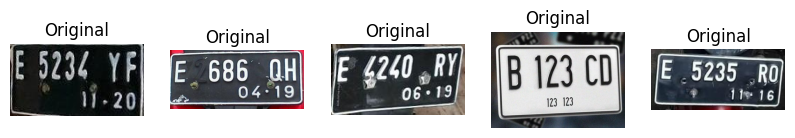

In [32]:
# original images
originals = []

for plate in selected_images:
  originals.append(cv2.imread(plate))

# display originals
fig, axes = plt.subplots(1, len(originals), figsize=(10, 5))
for ax, image in zip(axes, originals):
  rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  ax.imshow(rgb_image)
  ax.set_title('Original')
  ax.axis('off')
plt.show()

In [33]:
datas = []
for img in originals:
 datas.append(process_image(img))

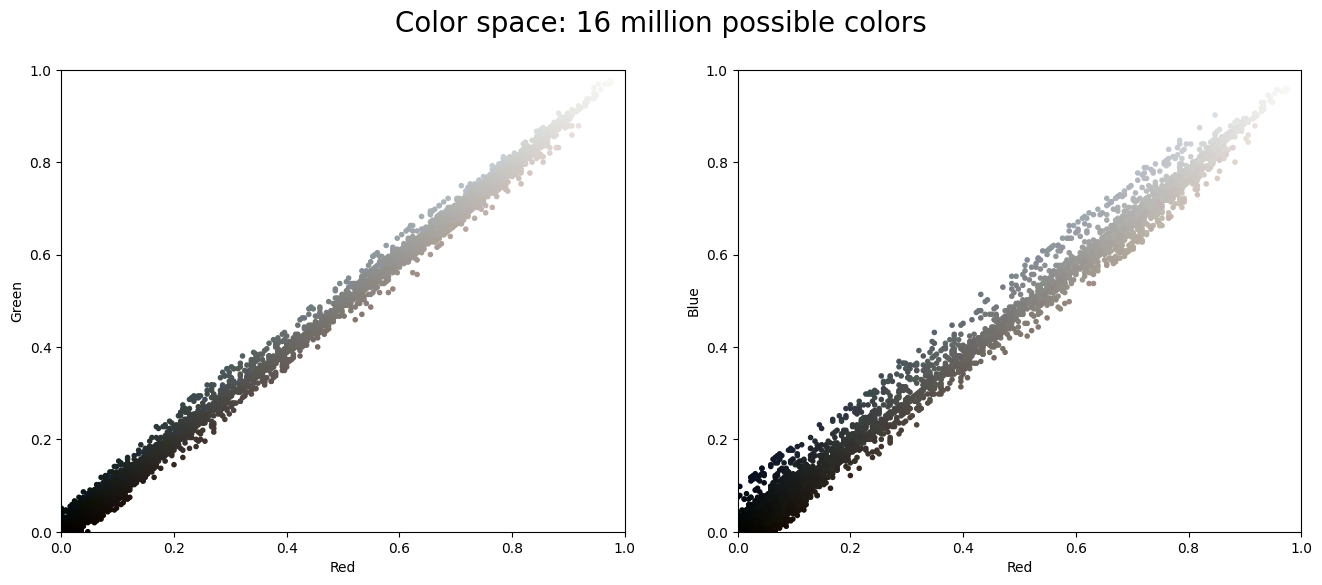

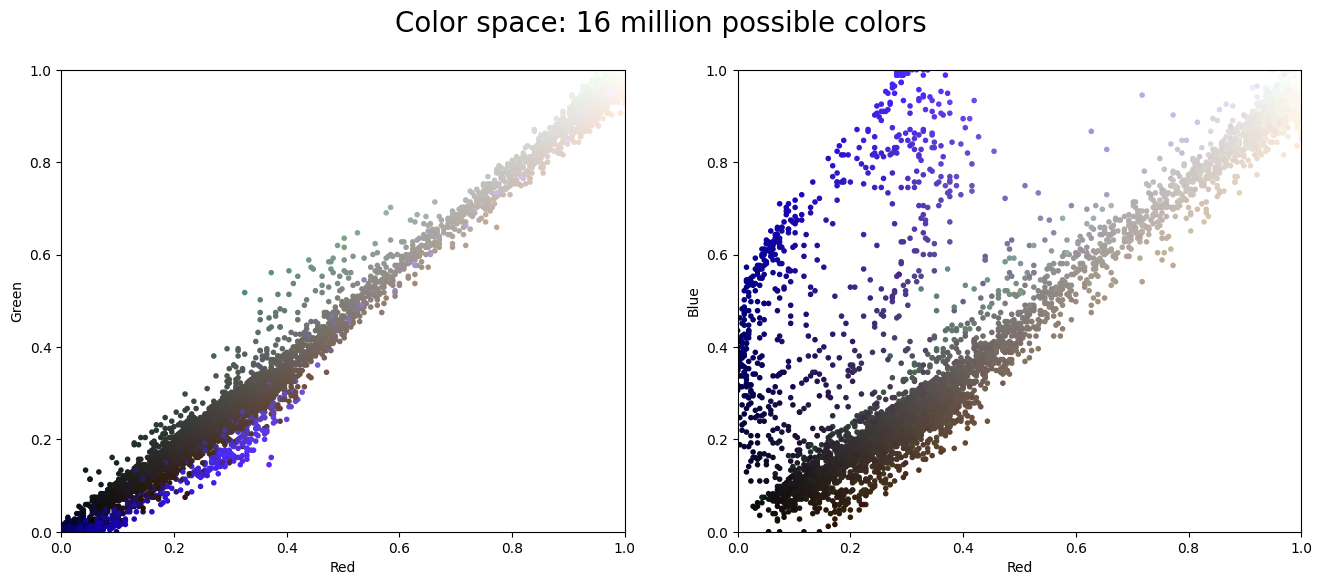

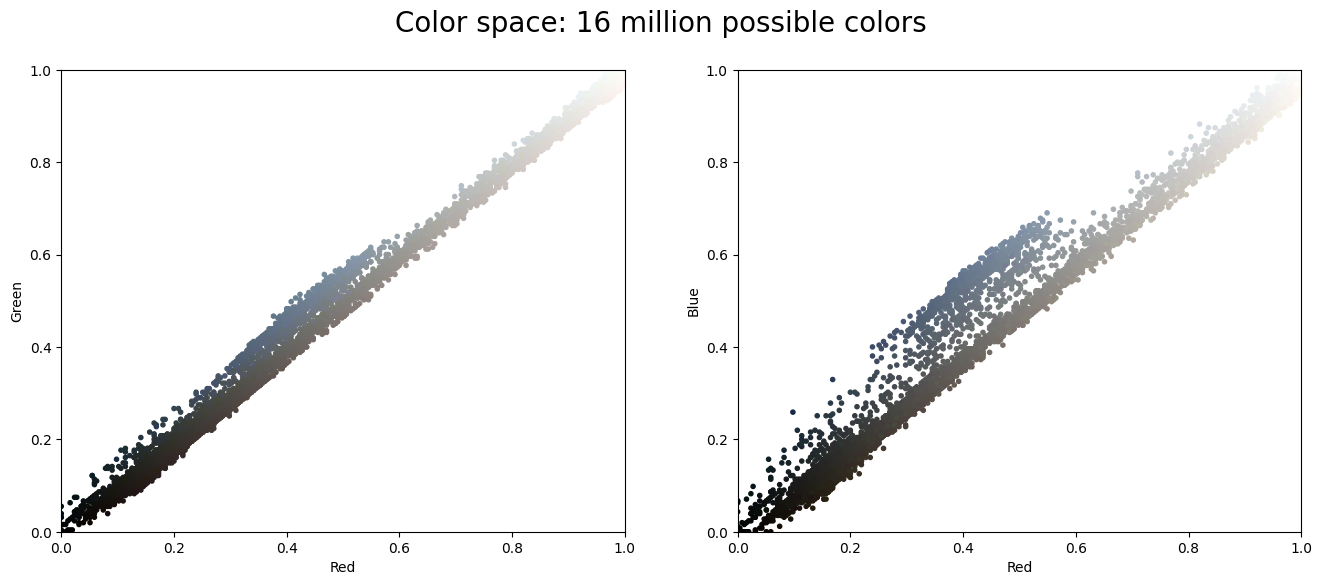

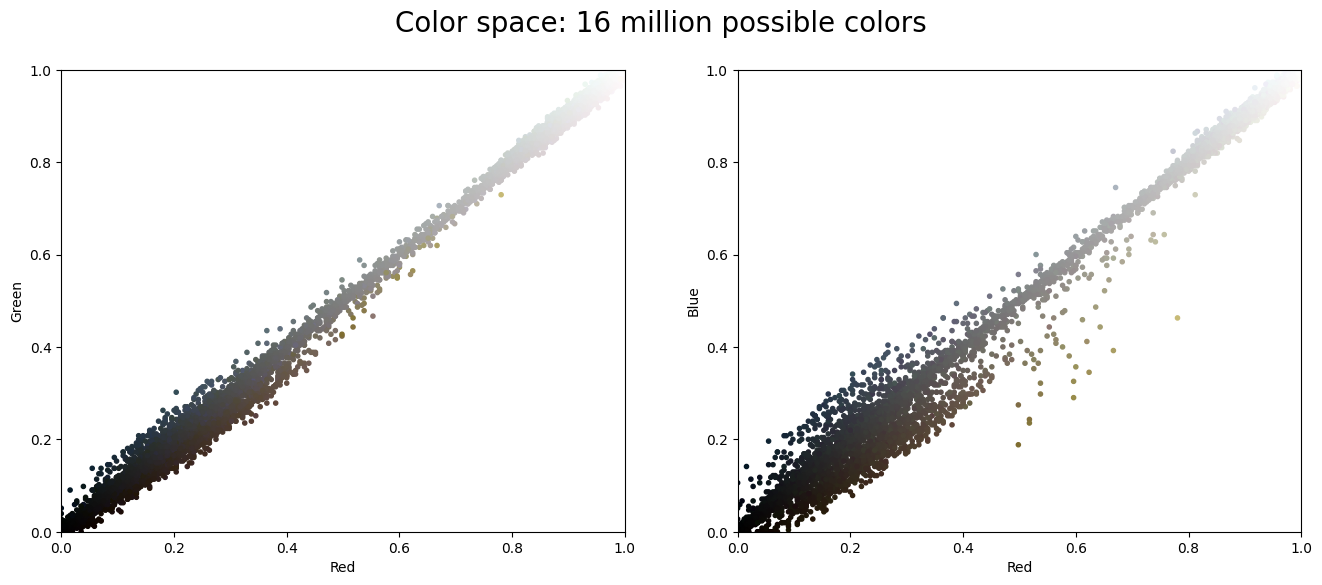

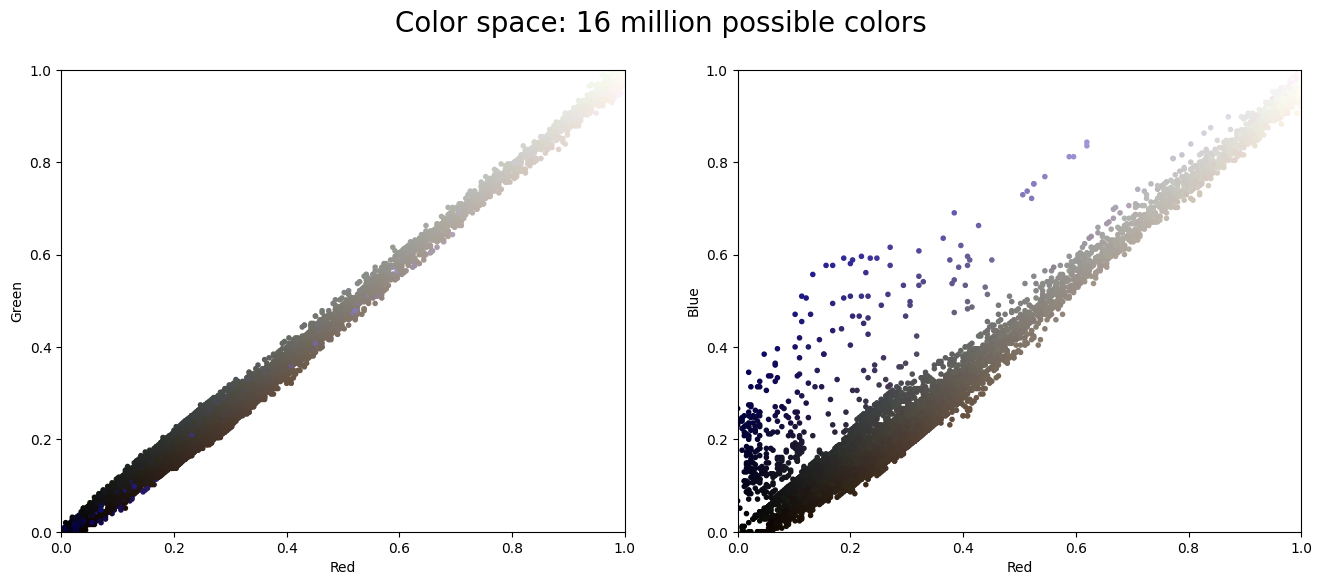

In [34]:
for data in datas:
 plot_pixels(data, title='Color space: 16 million possible colors')

In [35]:
for img in originals:
 reshape_pixel(img)

**KMeans Modelling**

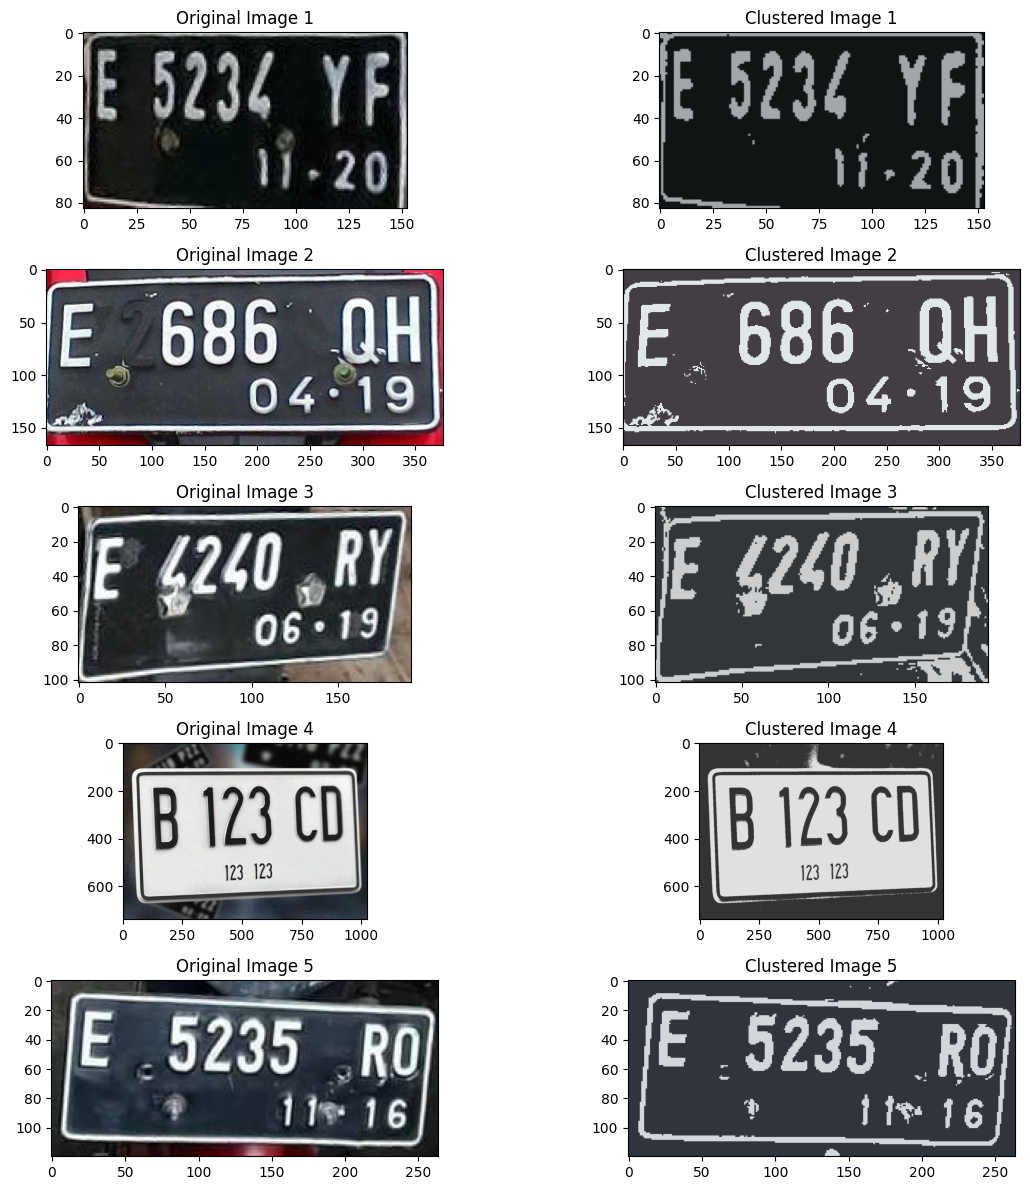

In [36]:
# K-means clustering parameters
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
k = 2

# Create a list to store clustered images
clustered_images = []

# Create a figure to display all images
plt.figure(figsize=(12, 12))

# Ensure that 'i' is within the valid range
for i, pixel_vals in enumerate(processed_pixel_vals_list):
  if i < len(originals):
    # Perform k-means clustering
    retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    # Convert data into 8-bit values
    centers = np.uint8(centers)
    segmented_data = centers[labels.flatten()]
    # Reshape data into the original image dimensions
    segmented_image = segmented_data.reshape((originals[i].shape))
    clustered_images.append(segmented_image)
    # Display the original and clustered images in subplots
    plt.subplot(5, 2, 2 * i + 1) # 5 rows, 2 columns
    plt.imshow(cv2.cvtColor(originals[i], cv2.COLOR_BGR2RGB))
    plt.title(f'Original Image {i + 1}')
    plt.subplot(5, 2, 2 * i + 2) # 5 rows, 2 columns
    plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
    plt.title(f'Clustered Image {i + 1}')
plt.tight_layout()
plt.show()